### Random Forests

Random forests use a technique known as <b> bagging </b> , which is an <b> ensemble </b> method .Random forest: An ensemble made by the <b> combination of a large number of decision trees </b>.<p>
 Before understanding about random forests, we should know 
 * Why should a collection of models work better than individual ones?

 * How do you choose the individual models to form the ensemble, so that it is better than any of the individual models themselves?
 
<b> Diversity and Acceptability </b>

Ensembles of models are somewhat analogous to teams of individual players. If you were to choose a football team, there would be two things you’d do:Choose people with different skill sets, such as defenders, attackers, and a goalkeeper, to ensure diversity, and Choose good players, i.e. ensure that all players are acceptable from a skill set point of view (and at least better than a regular person

<b> Diversity </b> ensures that the models make predictions independent of each other. The independence among the trees results in a <b> lower variance </b> 

<b> Acceptability</b> implies that each model is at least better than a <b> random model</b>

<hr />

#### There are two critical steps in building a random forest:

<b> Bagging </b>  or choosing observations in a bootstrapped manner and creating individual trees

<b> Random subsetting of features </b> while creating each tree and finding the right splits

<b> Time Taken to Build an Ensemble : </b>
* Time is proportioal to  : No of <b> trees </b> (n_estimators)
* Time is proportional to : No of <b> features </b> at each split ( generally it is √M , M is the no of features)
* Time is proportional to : No of <b> levels </b> in each tree ( generally it is log(n) , n is the no of data points)


<hr />

<b> Advantages of Random Forests </b>

<b>Diversity </b> arises because you create each tree with a subset of the attributes/features/variables, i.e. you don’t consider all the attributes while making each tree. The choice of the attributes considered for each tree is random. This ensures that the trees are independent of each other.

 

<b>Stability </b> arises because the answers given by a large number of trees average out. A random forest has a lower model variance than an ordinary individual tree.

 

<b>Immunity to the curse of dimensionality: </b> Since each tree does not consider all the features, the feature space (the number of features a model has to consider) reduces. This makes the algorithm immune to the curse of dimensionality. A large feature space causes computational and complexity issues.

 

<b>Parallelizability:</b> You need a number of trees to make a forest. Since two trees are independently built on different data and attributes, they can be built separately. This implies that you can make full use of your multi-core CPU to build random forests. Suppose there are 4 cores and 100 trees to be built; each core can build 25 trees to make a forest.

 

<b> Testing /training data and the OOB or out-of-bag error: </b> You always want to avoid violating the fundamental tenet of learning: “not testing a model on what it has been trained on”. While building individual trees, you choose a random subset of the observations to train it. If you have 10,000 observations, each tree may only be made from 7000 (70%) randomly chosen observations. OOB is the mean prediction error on each training sample xᵢ, using only the trees that do not have xᵢ in their bootstrap sample. If you think about it, this is very similar to a cross-validation error. In a CV error, you can measure the performance on the subset of data the model hasn’t seen before.

<hr />

### Random Forest Implementation

 we will build a random forest model to predict whether a given customer defaults or not. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

We'll start the process with data cleaning and preparation and then tune the model to find optimal hyperparameters.

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('credit-card-default.csv')

#### Exploratory Data Analysis

In [6]:
#Check the size of the data
df.shape

(30000, 25)

In [5]:
#Observe the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
#Check the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


By observing above data, there are no Null values in any column and all are Numeric data

In [10]:
#Cross Check if there are any null values
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [12]:
#Describe the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


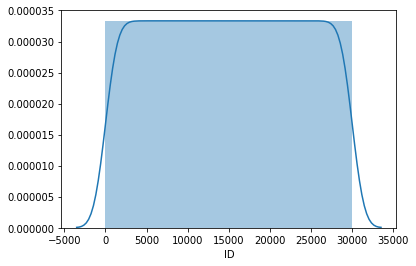

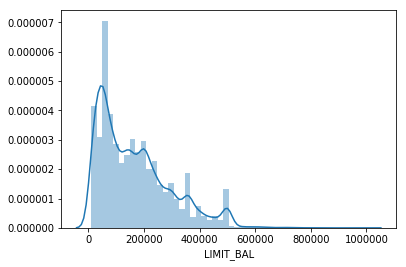

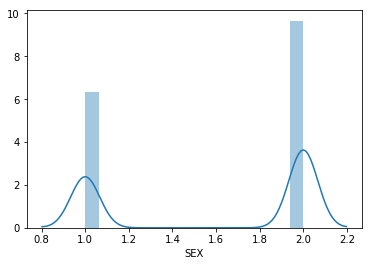

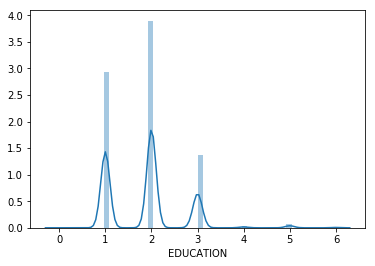

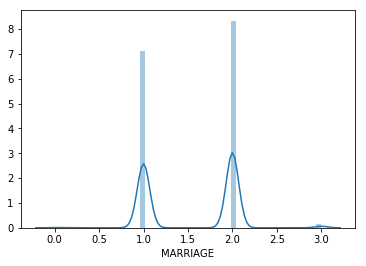

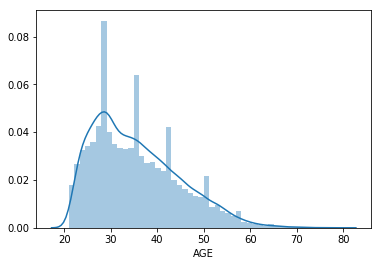

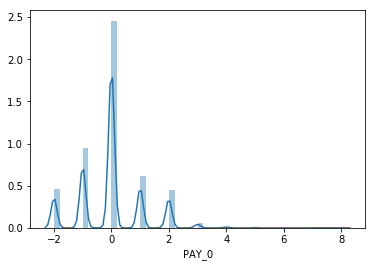

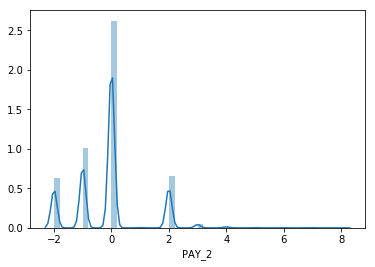

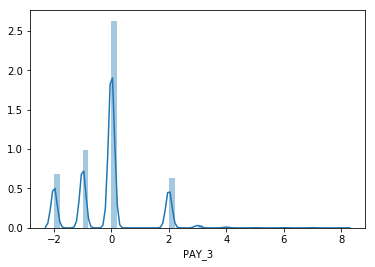

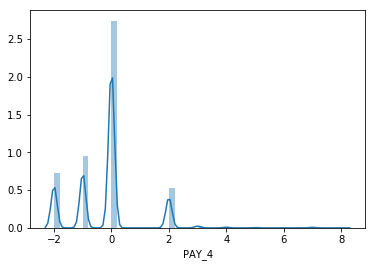

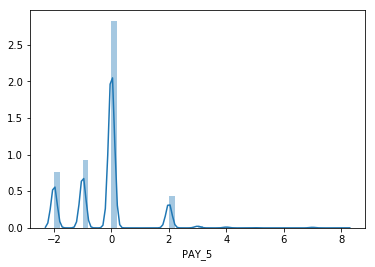

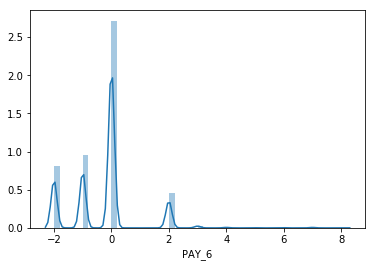

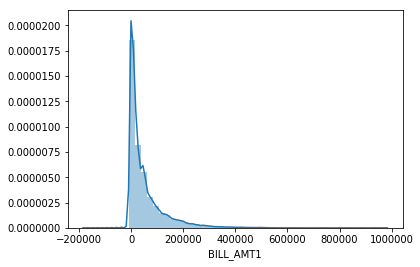

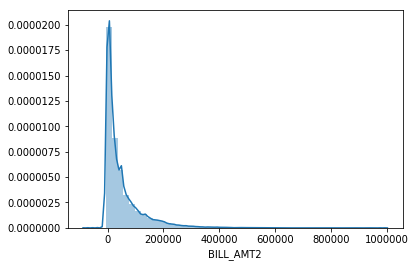

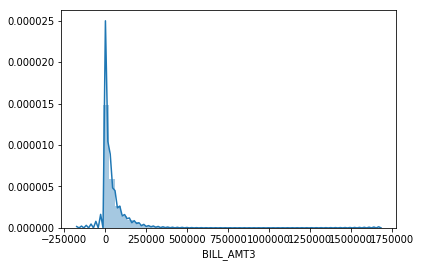

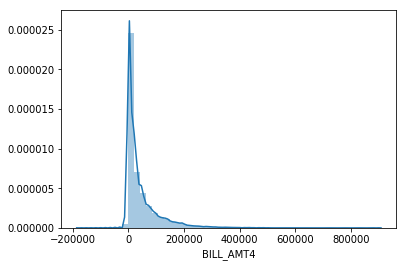

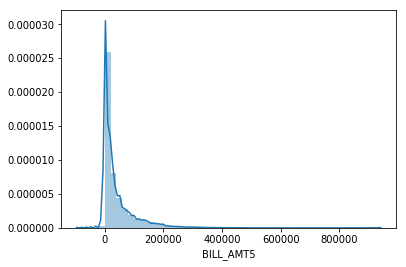

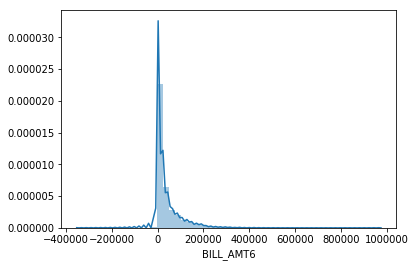

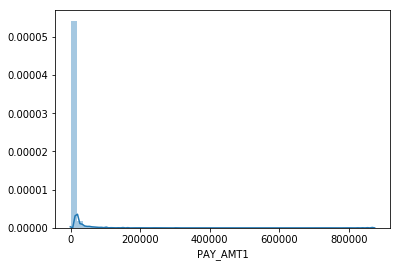

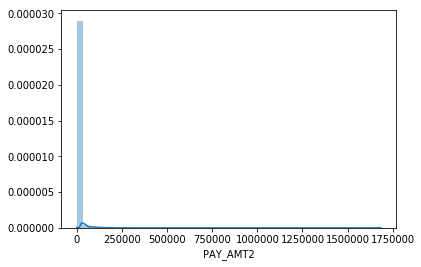

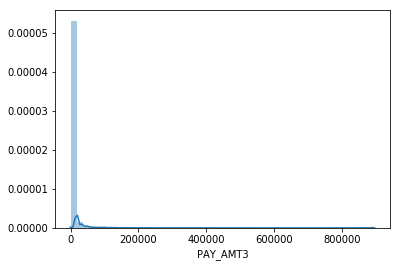

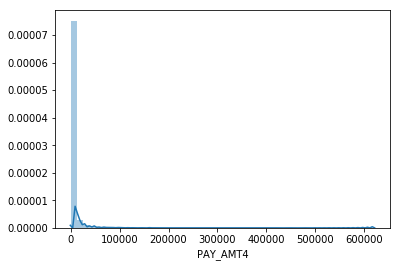

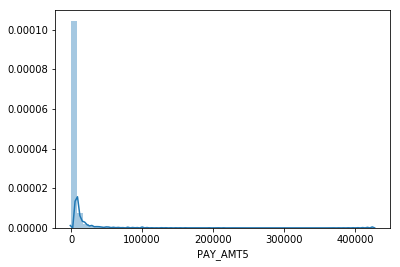

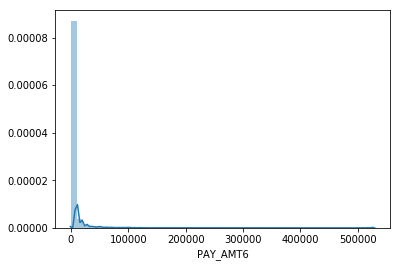

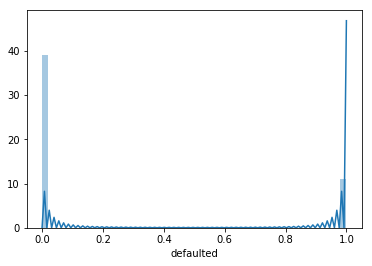

In [13]:
#Plot Distributions to see the data
for col in list(df.columns):
    sns.distplot(df[col])
    plt.show()

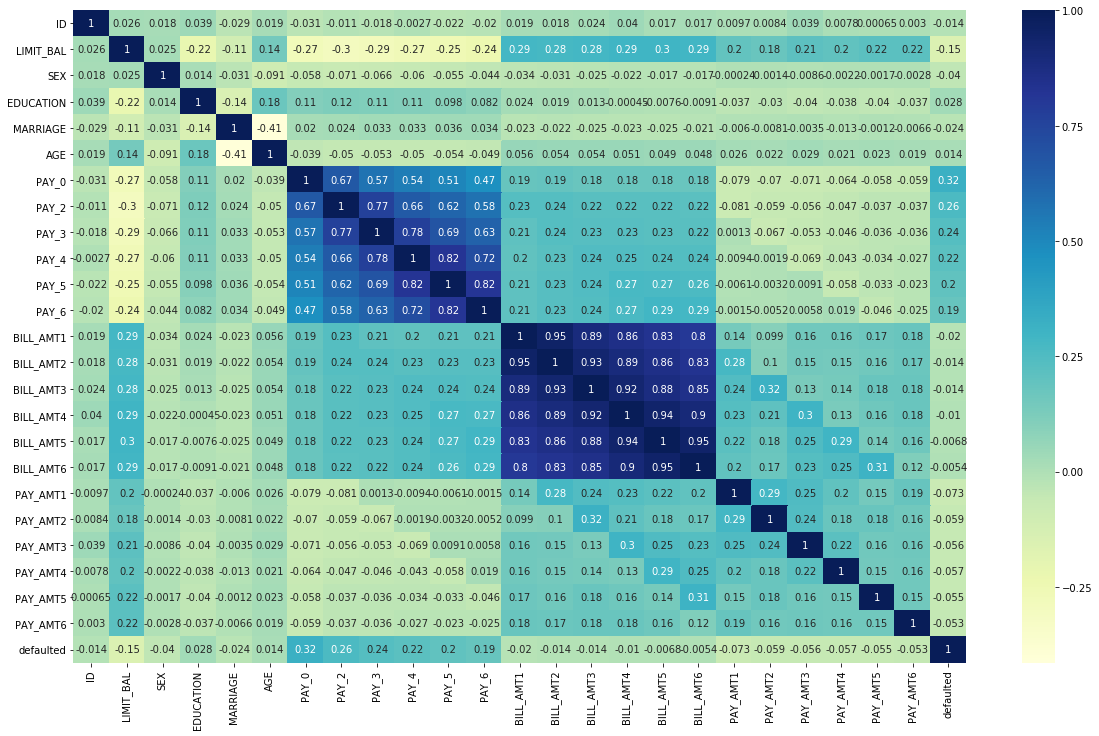

In [16]:
#Observe the correlation among the variables
plt.figure(figsize=(20,12))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

As can be seen from the above There is High correlation about Bill_AMt variables and Pay variable, thats the reason we can observe some clusters among them 

#### Model 1 ( Default Random Forest Classifier)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [32]:
rfc = RandomForestClassifier(verbose=1)

In [20]:
X = df.drop("defaulted",axis=1)

y = df["defaulted"]

In [22]:
#Splitting the data for train and test 
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [24]:
#Observe the no of records
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 24)
(9000, 24)
(21000,)
(9000,)


In [27]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and use averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |      Note: this parameter is tree-specific.
 |  
 |  max_features : int, fl

In [33]:
#fit the data on the model
rfc.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

As can be seen from above , the default no of trees in Random forest is 10, uses "gini" index as a measure of Homogenity

In [34]:
print("Out of Bag Error is used ? {} ".format(rfc.oob_score))

Out of Bag Error is used ? False 


In [35]:
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [46]:
print("accuracy {}:".format(round(accuracy_score(y_pred,y_test)*100,2)))
print()
print("Classification Report \n {}:".format(classification_report(y_pred,y_test)))
print()
print("Confusion Matrix \n {}:".format(confusion_matrix(y_pred,y_test)))

accuracy 80.42:

Classification Report 
              precision    recall  f1-score   support

          0       0.94      0.83      0.88      7921
          1       0.34      0.64      0.44      1079

avg / total       0.87      0.80      0.83      9000
:

Confusion Matrix 
 [[6543 1378]
 [ 384  695]]:


<hr />

### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
